In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# 50 %

In [32]:
data = pd.read_csv('../data/all_runs_results.csv')
data_2 = pd.read_csv('../data/all_runs_results_2.csv')
data = pd.concat([data, data_2], ignore_index=True)


In [33]:
pivot_avg = data.pivot_table(
    index='experiment',
    values='best_val_acc',
    aggfunc='mean'
).reset_index().sort_values(by='best_val_acc', ascending=False)

print(pivot_avg)

                      experiment  best_val_acc
12        Geometric Augmentation      0.986889
9    5% Synthetic Data + Geo Aug      0.985963
3   20% Synthetic Data + Geo Aug      0.984333
1   10% Synthetic Data + Geo Aug      0.984000
11  50% Synthetic Data + Geo Aug      0.983704
13               No Augmentation      0.983444
5   30% Synthetic Data + Geo Aug      0.982889
7   40% Synthetic Data + Geo Aug      0.982852
8              5% Synthetic Data      0.982259
0             10% Synthetic Data      0.980593
2             20% Synthetic Data      0.980222
6             40% Synthetic Data      0.979926
4             30% Synthetic Data      0.978370
10            50% Synthetic Data      0.978111


## T - test

In [34]:
baseline = data[data['experiment'] == 'No Augmentation']['best_val_acc']

In [35]:
for experiment in data['experiment'].unique():
    if experiment == 'No Augmentation':
        continue
    group = data[data['experiment']== experiment]['best_val_acc']
    t_stat, p_val = ttest_ind(baseline, group, equal_var=False)
    mean_diff = group.mean() - baseline.mean()
    print(f"{experiment}: ΔMean = {mean_diff:.4f}, t = {t_stat:.4f}, p = {p_val:.4f}")


Geometric Augmentation: ΔMean = 0.0034, t = -4.2923, p = 0.0004
5% Synthetic Data: ΔMean = -0.0012, t = 1.5594, p = 0.1368
10% Synthetic Data: ΔMean = -0.0029, t = 4.1725, p = 0.0008
20% Synthetic Data: ΔMean = -0.0032, t = 3.8973, p = 0.0011
30% Synthetic Data: ΔMean = -0.0051, t = 5.9540, p = 0.0000
40% Synthetic Data: ΔMean = -0.0035, t = 4.6130, p = 0.0002
50% Synthetic Data: ΔMean = -0.0053, t = 8.1787, p = 0.0000
20% Synthetic Data + Geo Aug: ΔMean = 0.0009, t = -1.1866, p = 0.2515
30% Synthetic Data + Geo Aug: ΔMean = -0.0006, t = 0.8763, p = 0.3977
40% Synthetic Data + Geo Aug: ΔMean = -0.0006, t = 0.7998, p = 0.4348
50% Synthetic Data + Geo Aug: ΔMean = 0.0003, t = -0.3677, p = 0.7179
5% Synthetic Data + Geo Aug: ΔMean = 0.0025, t = -3.3225, p = 0.0039
10% Synthetic Data + Geo Aug: ΔMean = 0.0006, t = -0.8248, p = 0.4229


# 10 %

In [26]:
data = pd.read_csv('../data/all_runs_results_10.csv')
#remove columne xperiment type:
data= data.drop(columns=['experiment_type'], errors='ignore')
data_2 = pd.read_csv('../data/accuracy_across_runs.csv') #another 10 runs
data_2 = data_2.drop(columns=['experiment_type'], errors='ignore')
print(data.head(20))
data_2['experiment'] = data_2['experiment'].str.replace(r'(\d+%) Synthetic \+ Geometric', r'\1 Synthetic Data + Geo Aug', regex=True)
data = pd.concat([data, data_2], ignore_index=True)
print(data)
pivot_avg = data.pivot_table(
    index='experiment',
    values='best_val_acc',
    aggfunc='mean'
).reset_index().sort_values(by='best_val_acc', ascending=False)
print(pivot_avg)

                      experiment  best_val_acc  run_id
0                No Augmentation      0.961111       1
1         Geometric Augmentation      0.974074       1
2              5% Synthetic Data      0.961111       1
3             10% Synthetic Data      0.966667       1
4             20% Synthetic Data      0.961111       1
5             30% Synthetic Data      0.935185       1
6             40% Synthetic Data      0.962963       1
7             50% Synthetic Data      0.961111       1
8    5% Synthetic Data + Geo Aug      0.959259       1
9   10% Synthetic Data + Geo Aug      0.966667       1
10  20% Synthetic Data + Geo Aug      0.968519       1
11  30% Synthetic Data + Geo Aug      0.972222       1
12  40% Synthetic Data + Geo Aug      0.968519       1
13  50% Synthetic Data + Geo Aug      0.966667       1
14               No Augmentation      0.959259       2
15        Geometric Augmentation      0.966667       2
16             5% Synthetic Data      0.964815       2
17        

## T - Test

In [31]:
baseline = data[data['experiment'] == 'No Augmentation']['best_val_acc']

for experiment in data['experiment'].unique():
    if experiment == 'No Augmentation':
        continue
    group = data[data['experiment']== experiment]['best_val_acc']
    t_stat, p_val = ttest_ind(baseline, group, equal_var=False)
    mean_diff = (group.mean() - baseline.mean())*100
    print(f"{experiment}: ΔMean = {mean_diff:.4f}, t = {t_stat:.4f}, p = {p_val:.4f}")


Geometric Augmentation: ΔMean = 0.7870, t = -6.1623, p = 0.0000
5% Synthetic Data: ΔMean = -0.1481, t = 1.0126, p = 0.3180
10% Synthetic Data: ΔMean = -0.1204, t = 0.9155, p = 0.3657
20% Synthetic Data: ΔMean = -0.2500, t = 1.6726, p = 0.1031
30% Synthetic Data: ΔMean = -1.5278, t = 9.3993, p = 0.0000
40% Synthetic Data: ΔMean = -0.4630, t = 3.1656, p = 0.0031
50% Synthetic Data: ΔMean = -0.7685, t = 5.3395, p = 0.0000
5% Synthetic Data + Geo Aug: ΔMean = 0.3889, t = -2.9107, p = 0.0060
10% Synthetic Data + Geo Aug: ΔMean = 0.3796, t = -2.9957, p = 0.0048
20% Synthetic Data + Geo Aug: ΔMean = 0.1667, t = -1.2668, p = 0.2129
30% Synthetic Data + Geo Aug: ΔMean = -0.2315, t = 1.1067, p = 0.2780
40% Synthetic Data + Geo Aug: ΔMean = 0.3148, t = -2.3780, p = 0.0225
50% Synthetic Data + Geo Aug: ΔMean = 0.2778, t = -1.9323, p = 0.0611


## F1

In [32]:
data = pd.read_csv('../data/f1_across_runs.csv')

data

,Class,Precision,Recall,F1-Score,Support,experiment,run_id
0,AnnualCrop,0.933333,0.965517,0.949153,58.0,No Augmentation,1
1,Forest,0.947368,1.000000,0.972973,54.0,No Augmentation,1
2,HerbaceousVegetation,0.911765,0.968750,0.939394,64.0,No Augmentation,1
3,Highway,0.959184,0.870370,0.912621,54.0,No Augmentation,1
4,Industrial,0.943396,1.000000,0.970874,50.0,No Augmentation,1
...,...,...,...,...,...,...,...
1395,Pasture,1.000000,0.947368,0.972973,38.0,50% Synthetic + Geometric,10
1396,PermanentCrop,0.940000,0.921569,0.930693,51.0,50% Synthetic + Geometric,10
1397,Residential,1.000000,0.983607,0.991736,61.0,50% Synthetic + Geometric,10
1398,River,0.962264,1.000000,0.980769,51.0,50% Synthetic + Geometric,10


In [58]:
import pandas as pd

# Load your data
data = pd.read_csv('../data/f1_across_runs.csv')

# Step 1: Average F1-score per class per experiment
avg_f1 = data.groupby(['Class', 'experiment'])['F1-Score'].mean().reset_index()

# Step 2: Extract baseline (No Augmentation)
baseline = avg_f1[avg_f1['experiment'] == 'No Augmentation'][['Class', 'F1-Score']].rename(columns={'F1-Score': 'Baseline'})

# Step 3: Merge baseline into the main table
merged = avg_f1.merge(baseline, on='Class')

# Step 4: Compute improvement over baseline
merged['Improvement'] = merged['F1-Score'] - merged['Baseline']

# Step 5: Find the best strategy per class
idx = merged.groupby('Class')['F1-Score'].idxmax()
best_strategies = merged.loc[idx].copy()

# Step 6: Round values and format for LaTeX
best_strategies['F1 Score'] = best_strategies['F1-Score'].round(6)
best_strategies['Improvement'] = best_strategies['Improvement'].round(6)
latex_df = best_strategies[['Class', 'experiment', 'F1 Score', 'Improvement']].rename(
    columns={'experiment': 'Best Strategy'}
)

# Step 7: Sort by improvement and display/export
latex_df = latex_df.sort_values(by='Improvement', ascending=False)
print(latex_df.to_string(index=False))

# Optional: Save to CSV for LaTeX table usage
latex_df.to_csv("best_strategy_by_class.csv", index=False)


               Class             Best Strategy  F1 Score  Improvement
          AnnualCrop 40% Synthetic + Geometric  0.974445     0.026505
       PermanentCrop    Geometric Augmentation  0.944256     0.019038
             Pasture    Geometric Augmentation  0.968408     0.013749
             Highway 10% Synthetic + Geometric  0.958941     0.010537
          Industrial  5% Synthetic + Geometric  0.964909     0.007040
         Residential         5% Synthetic Data  0.992576     0.005881
HerbaceousVegetation 20% Synthetic + Geometric  0.958623     0.005150
             SeaLake        40% Synthetic Data  0.996581     0.005128
               River 50% Synthetic + Geometric  0.980673     0.003608
              Forest    Geometric Augmentation  0.989771     0.002566


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


def visualize_class_metrics(class_metrics, confusion_matrix, experiment_name, class_names):
    """
    Visualize class-wise metrics

    Args:
        class_metrics: DataFrame with class-wise metrics
        confusion_matrix: Confusion matrix
        experiment_name: Name of the experiment
        class_names: List of class names
    """
    # 1. Plot class-wise F1 scores
    plt.figure(figsize=(10, 6))
    sns.barplot(data=class_metrics, x='Class', y='F1-Score')
    plt.title(f'F1 Score by Class - {experiment_name}')
    plt.xticks(rotation=45)
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.savefig(f'{experiment_name}_f1_scores.png')
    plt.show()

    # 2. Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {experiment_name}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.savefig(f'{experiment_name}_confusion_matrix.png')
    plt.show()

    # 3. Print metrics for classes with lowest performance
    print(f"\nClass-wise metrics for {experiment_name}:")
    print(class_metrics.sort_values('F1-Score').head(3))

In [35]:
visualize_class_metrics(data["run_id"== 'run_1'],confusion["run_id"== 'run_1'], "No Augmentation", data["class_names"].unique())

KeyError: False

## Confusion

In [43]:
confusion = pd.read_csv('../data/confusion_across_runs.csv')
confusion_mean = confusion.groupby('experiment').mean().reset_index()
confusion_mean = confusion_mean.drop(columns=['run_id'], errors='ignore')


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_confusion_and_average(df, class_names):

    experiments = df["experiment"].unique()
    avg_conf_matrices = {}

    for exp in experiments:
        exp_df = df[df["experiment"] == exp]

        matrices = []
        for run_id in exp_df["run_id"].unique():
            run_matrix_df = exp_df[exp_df["run_id"] == run_id]
            matrix = run_matrix_df[[str(i) for i in range(10)]].to_numpy()
            matrices.append(matrix)

        avg_matrix = np.mean(matrices, axis=0)
        avg_conf_matrices[exp] = avg_matrix

    return avg_conf_matrices
def plot_multiple_avg_conf_matrices(avg_matrices, class_names, experiments, filename='avg_confusions.png'):
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    axes = axes.flatten()

    for i, exp in enumerate(experiments):
        if exp not in avg_matrices:
            continue
        sns.heatmap(avg_matrices[exp], annot=True, fmt='.0f', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names, ax=axes[i])
        axes[i].set_title(f'Confusion Matrix: {exp}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('True')
        plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')
        plt.setp(axes[i].get_yticklabels(), rotation=0)

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()


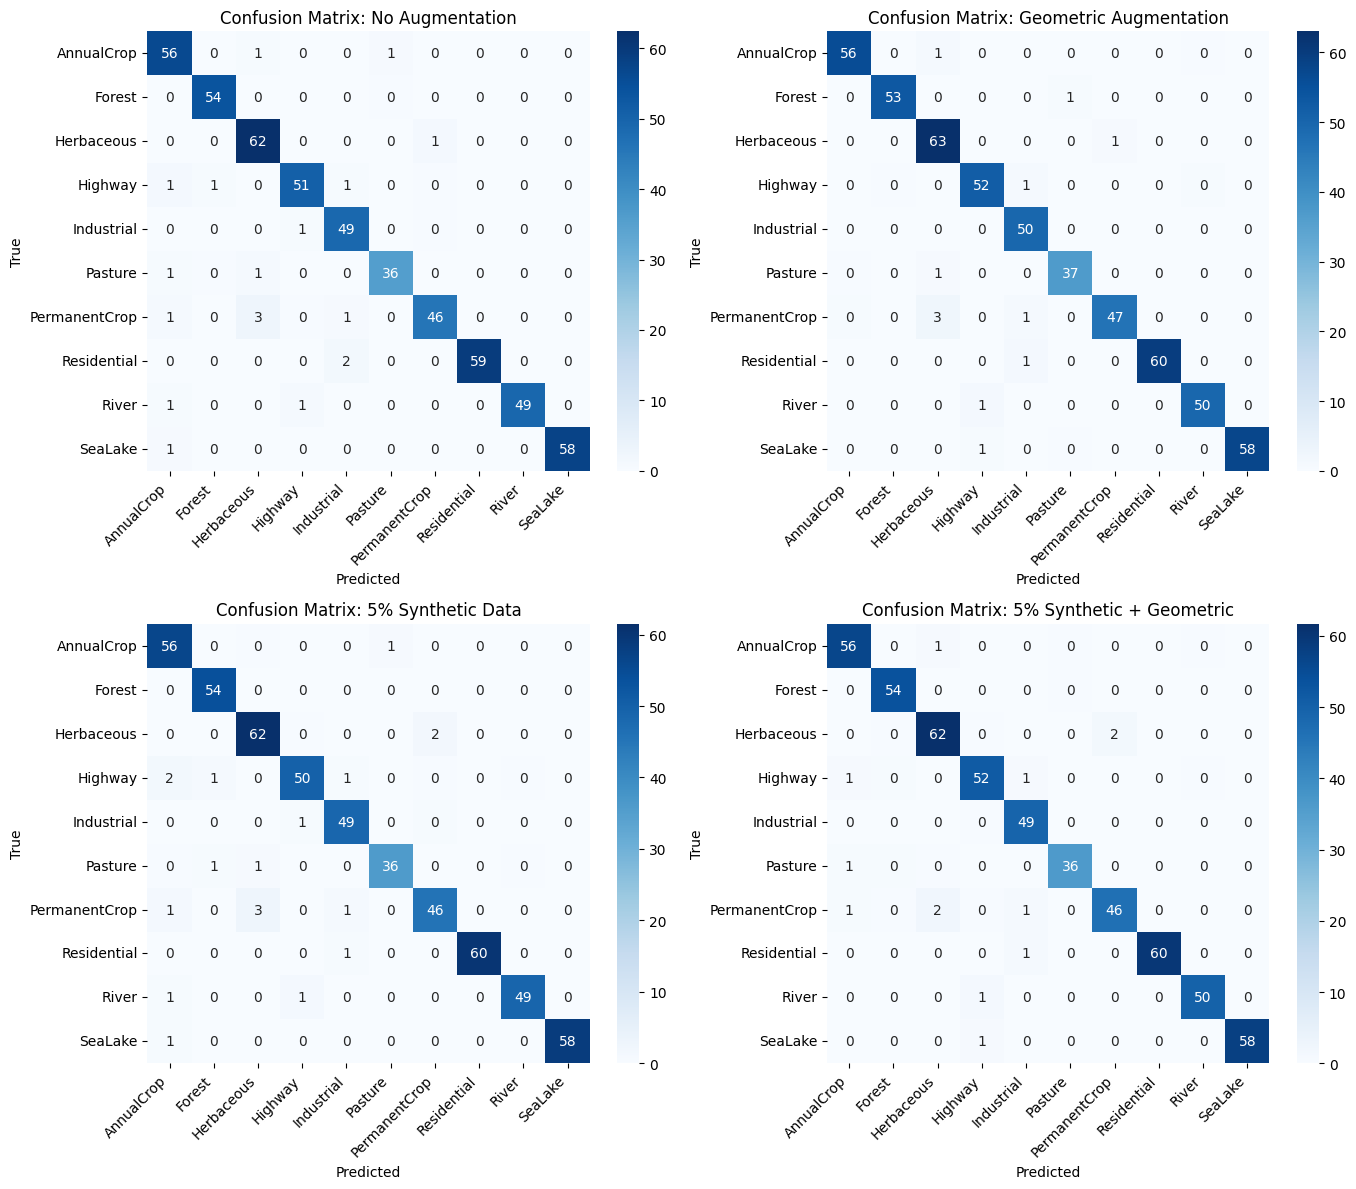

In [50]:
class_names = ['AnnualCrop', 'Forest', 'Herbaceous', 'Highway', 'Industrial',
               'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

avg_matrices = load_confusion_and_average(confusion, class_names)

selected_exps = ['No Augmentation', 'Geometric Augmentation', '5% Synthetic Data', '5% Synthetic + Geometric']
plot_multiple_avg_conf_matrices(avg_matrices, class_names, selected_exps)


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_confusion_delta(baseline_matrix, target_matrix, class_names, baseline_name="Baseline", target_name="Target", filename="delta_conf_matrix.png"):
    """
    Plot heatmap showing the difference between two confusion matrices.

    Args:
        baseline_matrix (np.ndarray): Average confusion matrix of the baseline (e.g. No Augmentation).
        target_matrix (np.ndarray): Average confusion matrix of the experiment to compare.
        class_names (list): List of class names (length = n_classes).
        baseline_name (str): Label for baseline in title.
        target_name (str): Label for target in title.
        filename (str): File name to save the figure.
    """
    delta = target_matrix - baseline_matrix

    plt.figure(figsize=(10, 8))
    sns.heatmap(delta, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                xticklabels=class_names, yticklabels=class_names, cbar_kws={'label': 'Δ Count'})
    plt.title(f'Change in Confusion Matrix: {target_name} vs {baseline_name}')
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()


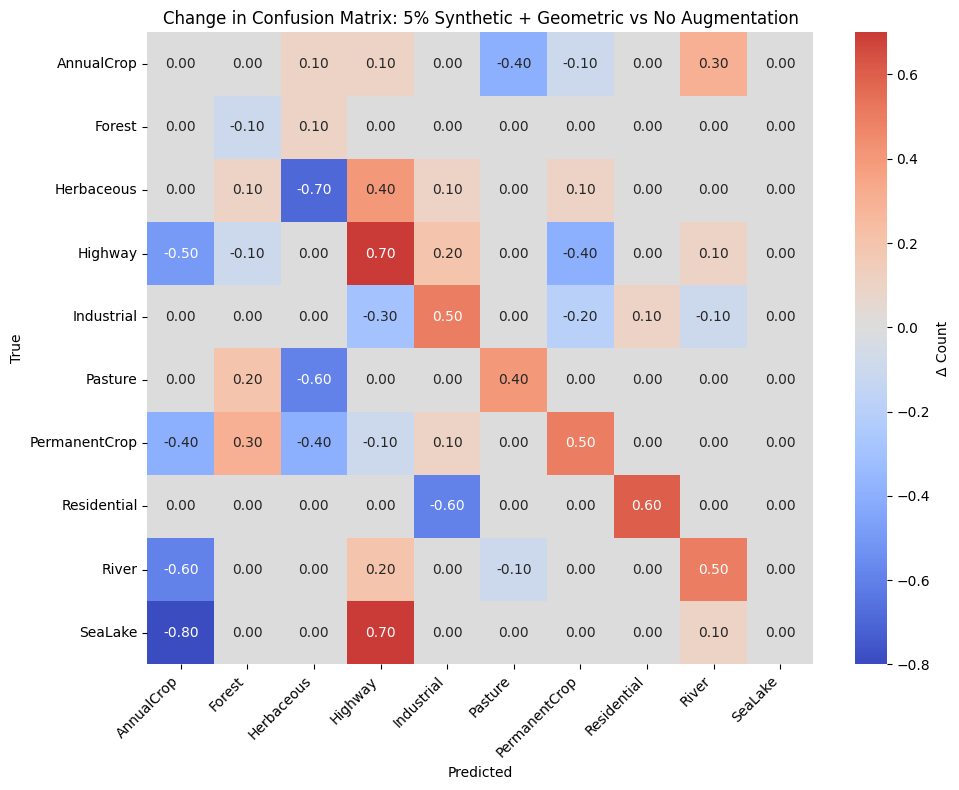

In [56]:
# Assume you already computed these:
# avg_matrices["No Augmentation"]
# avg_matrices["5% Synthetic + Geometric"]

plot_confusion_delta(
    baseline_matrix=avg_matrices["No Augmentation"],
    target_matrix=avg_matrices["5% Synthetic + Geometric"],
    class_names=class_names,
    baseline_name="No Augmentation",
    target_name="5% Synthetic + Geometric",
    filename="delta_matrix_5pc_synth_geo_vs_baseline.png"
)
